In [50]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt 
import seaborn as sns

In [51]:
df = pd.read_csv('../data/rock_density_xray.csv')

In [52]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [53]:
df.columns = ['Signal', 'Density']

<Axes: xlabel='Signal', ylabel='Density'>

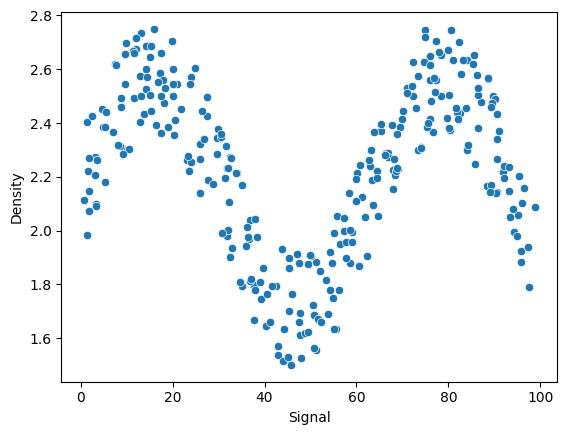

In [54]:
sns.scatterplot(x='Signal', y='Density', data=df)

# Linear Regression

In [55]:
X = df['Signal'].values.reshape(-1, 1)
y = df['Density']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr_model = LinearRegression()

In [59]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [60]:
lr_preds = lr_model.predict(X_test)
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [62]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [63]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.2570051996584629

<Axes: xlabel='Signal', ylabel='Density'>

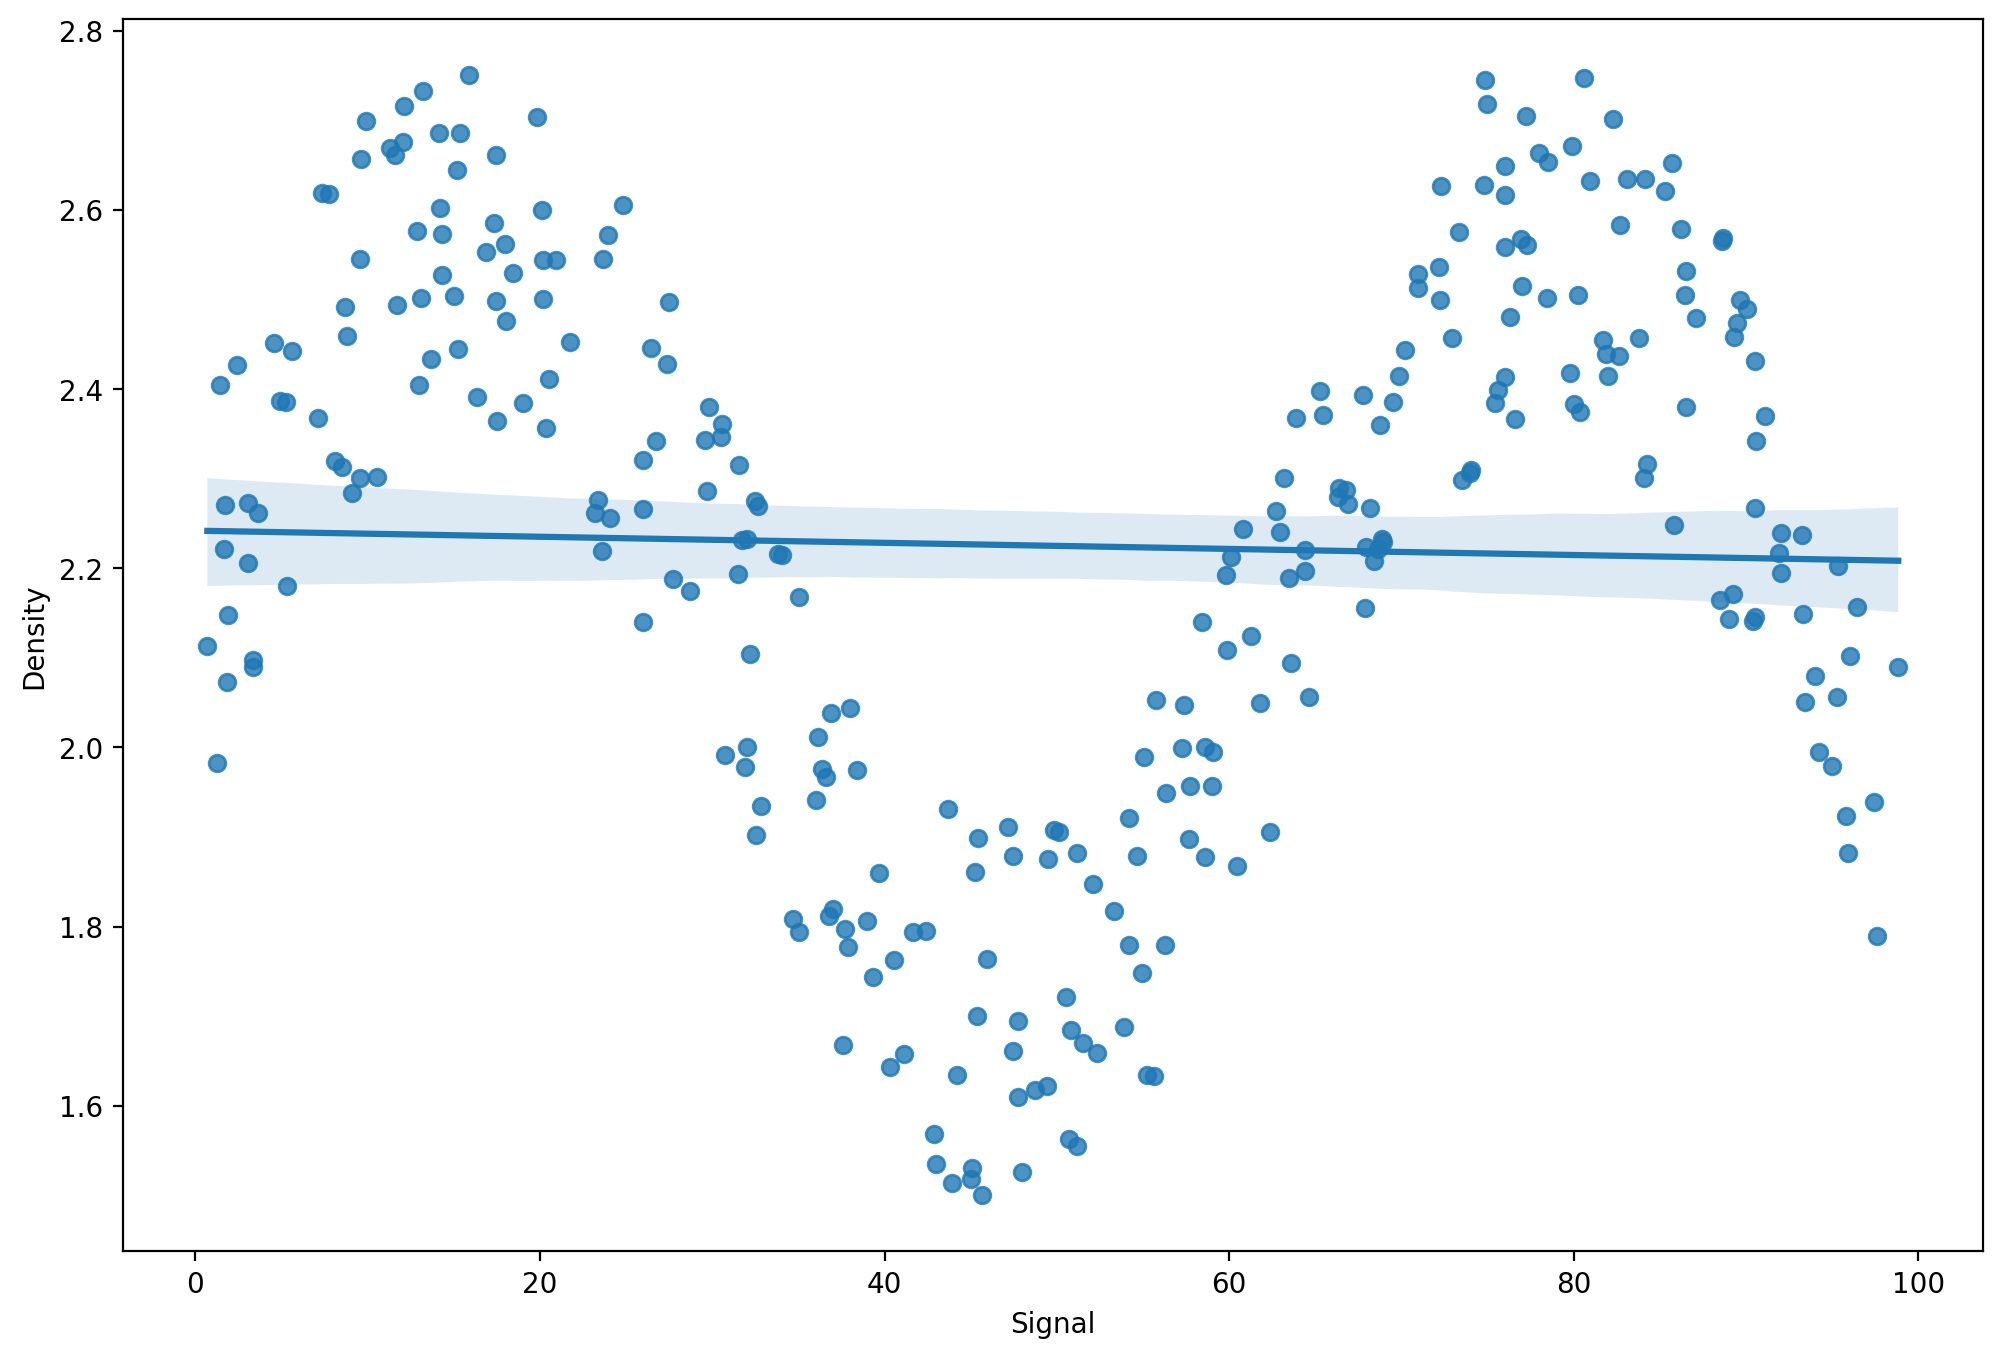

In [64]:
plt.figure(figsize=(12, 8), dpi=200)
sns.regplot(x='Signal', y='Density', data=df)

# Polynomial Regression

In [83]:
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)

    print(f'RMSE: {rmse}\nMAR: {mae}\n')

    signal_ranege = np.arange(0, 100)
    signal_preds = model.predict(signal_ranege.reshape(-1, 1))
    plt.figure(figsize=(12, 8), dpi=200)
    sns.scatterplot(x='Signal', y='Density', data=df, color='black')
    plt.plot(signal_ranege, signal_preds)

In [84]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [85]:
pipe = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())

RMSE: 0.14452813084167157
MAR: 0.11864312011579757



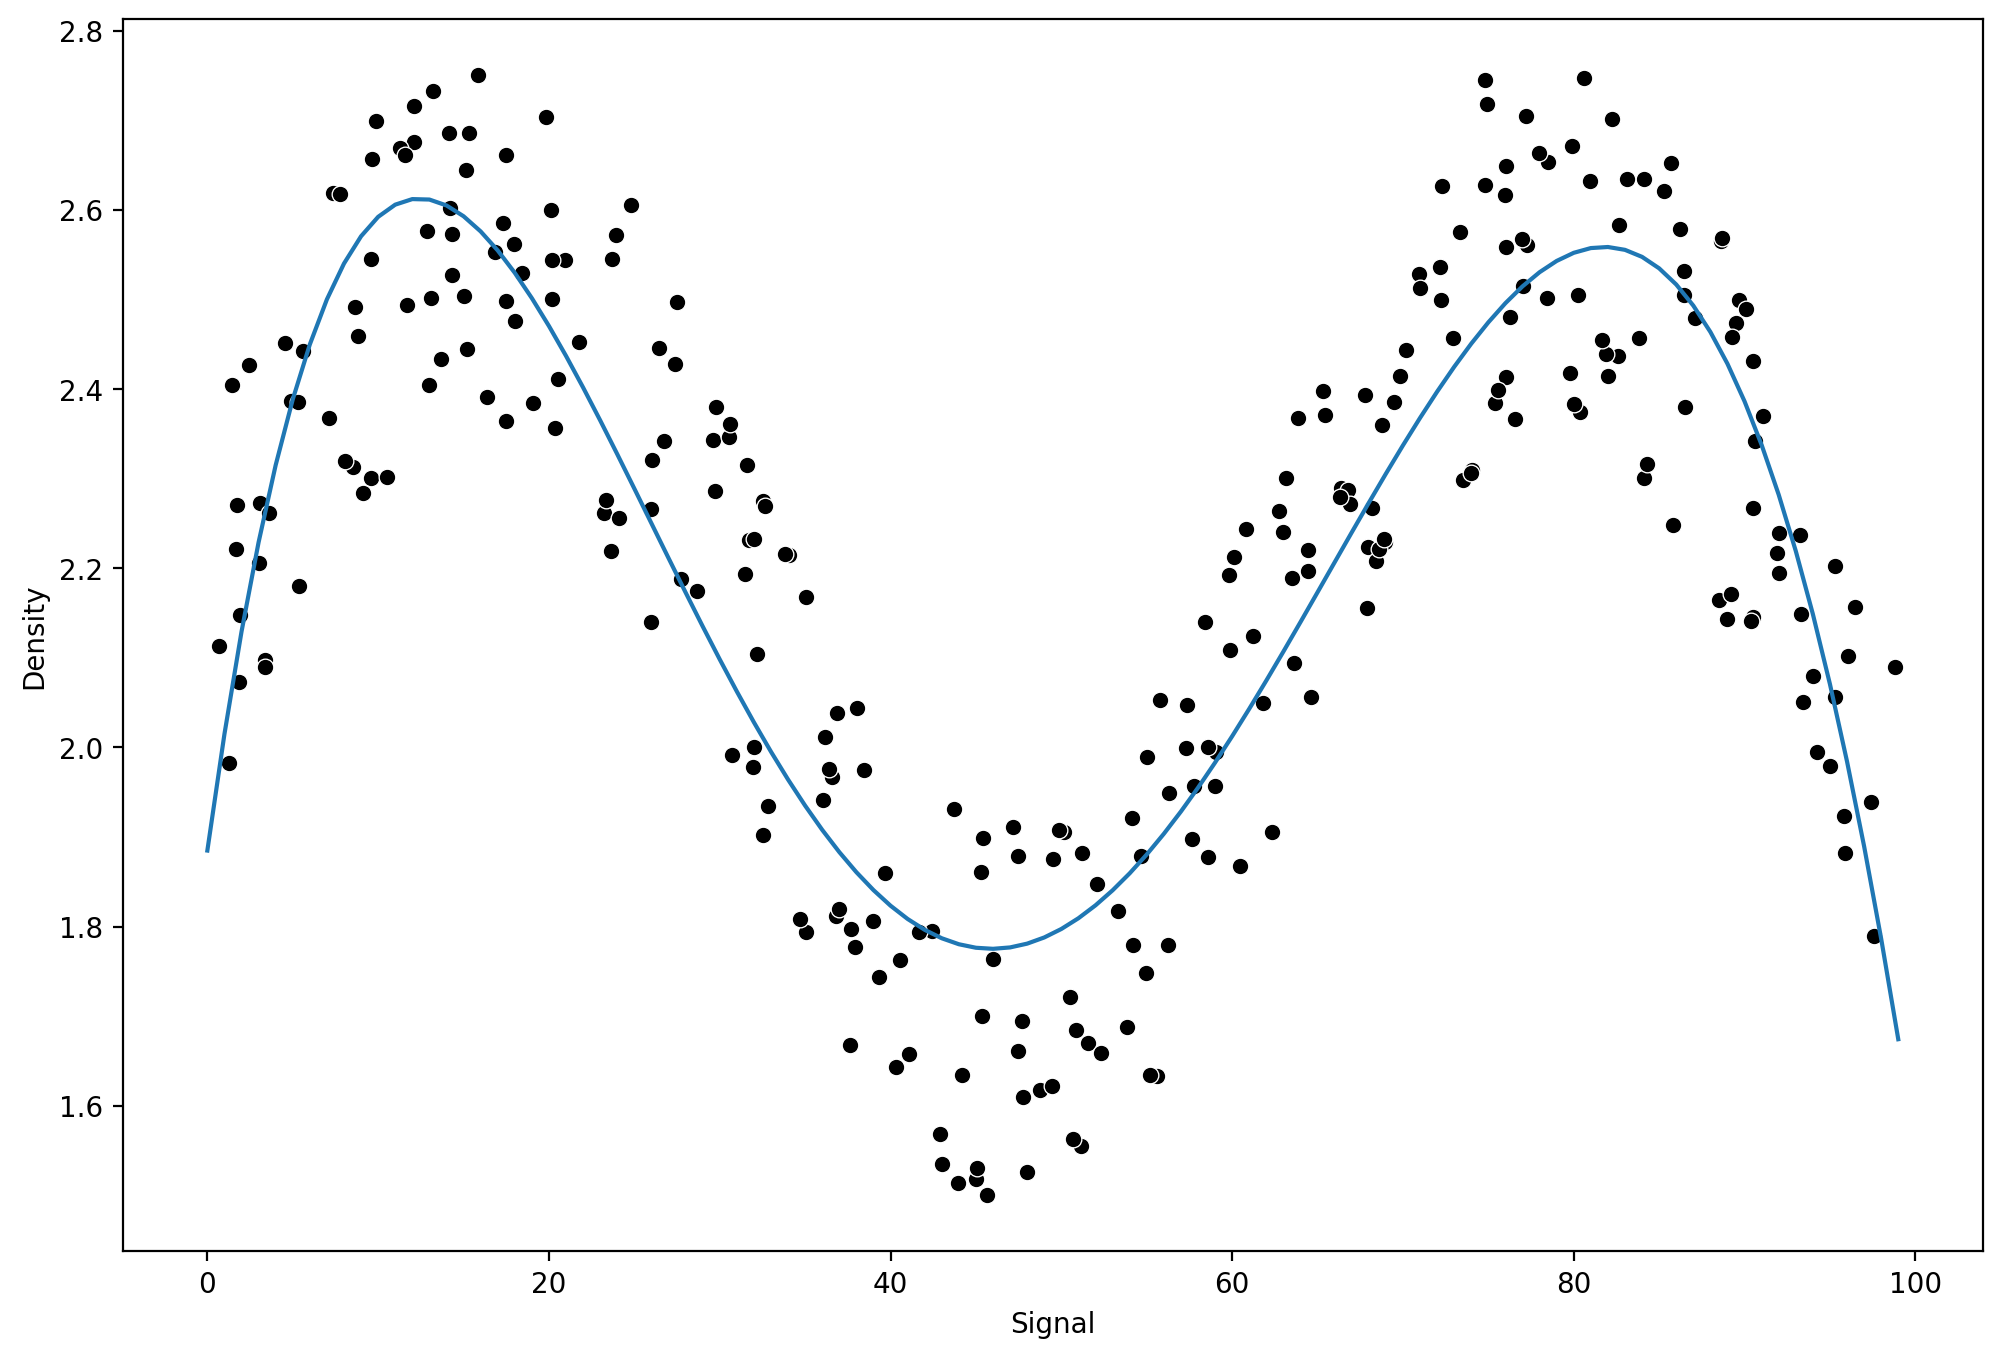

In [86]:
run_model(pipe, X_train, y_train, X_test, y_test)

# KNR

In [87]:
from sklearn.neighbors import KNeighborsRegressor

RMSE: 0.1523487028635337
MAR: 0.11877297474442378

RMSE: 0.13730685016923647
MAR: 0.12198383614100558

RMSE: 0.13277855732740926
MAR: 0.11635971693292672



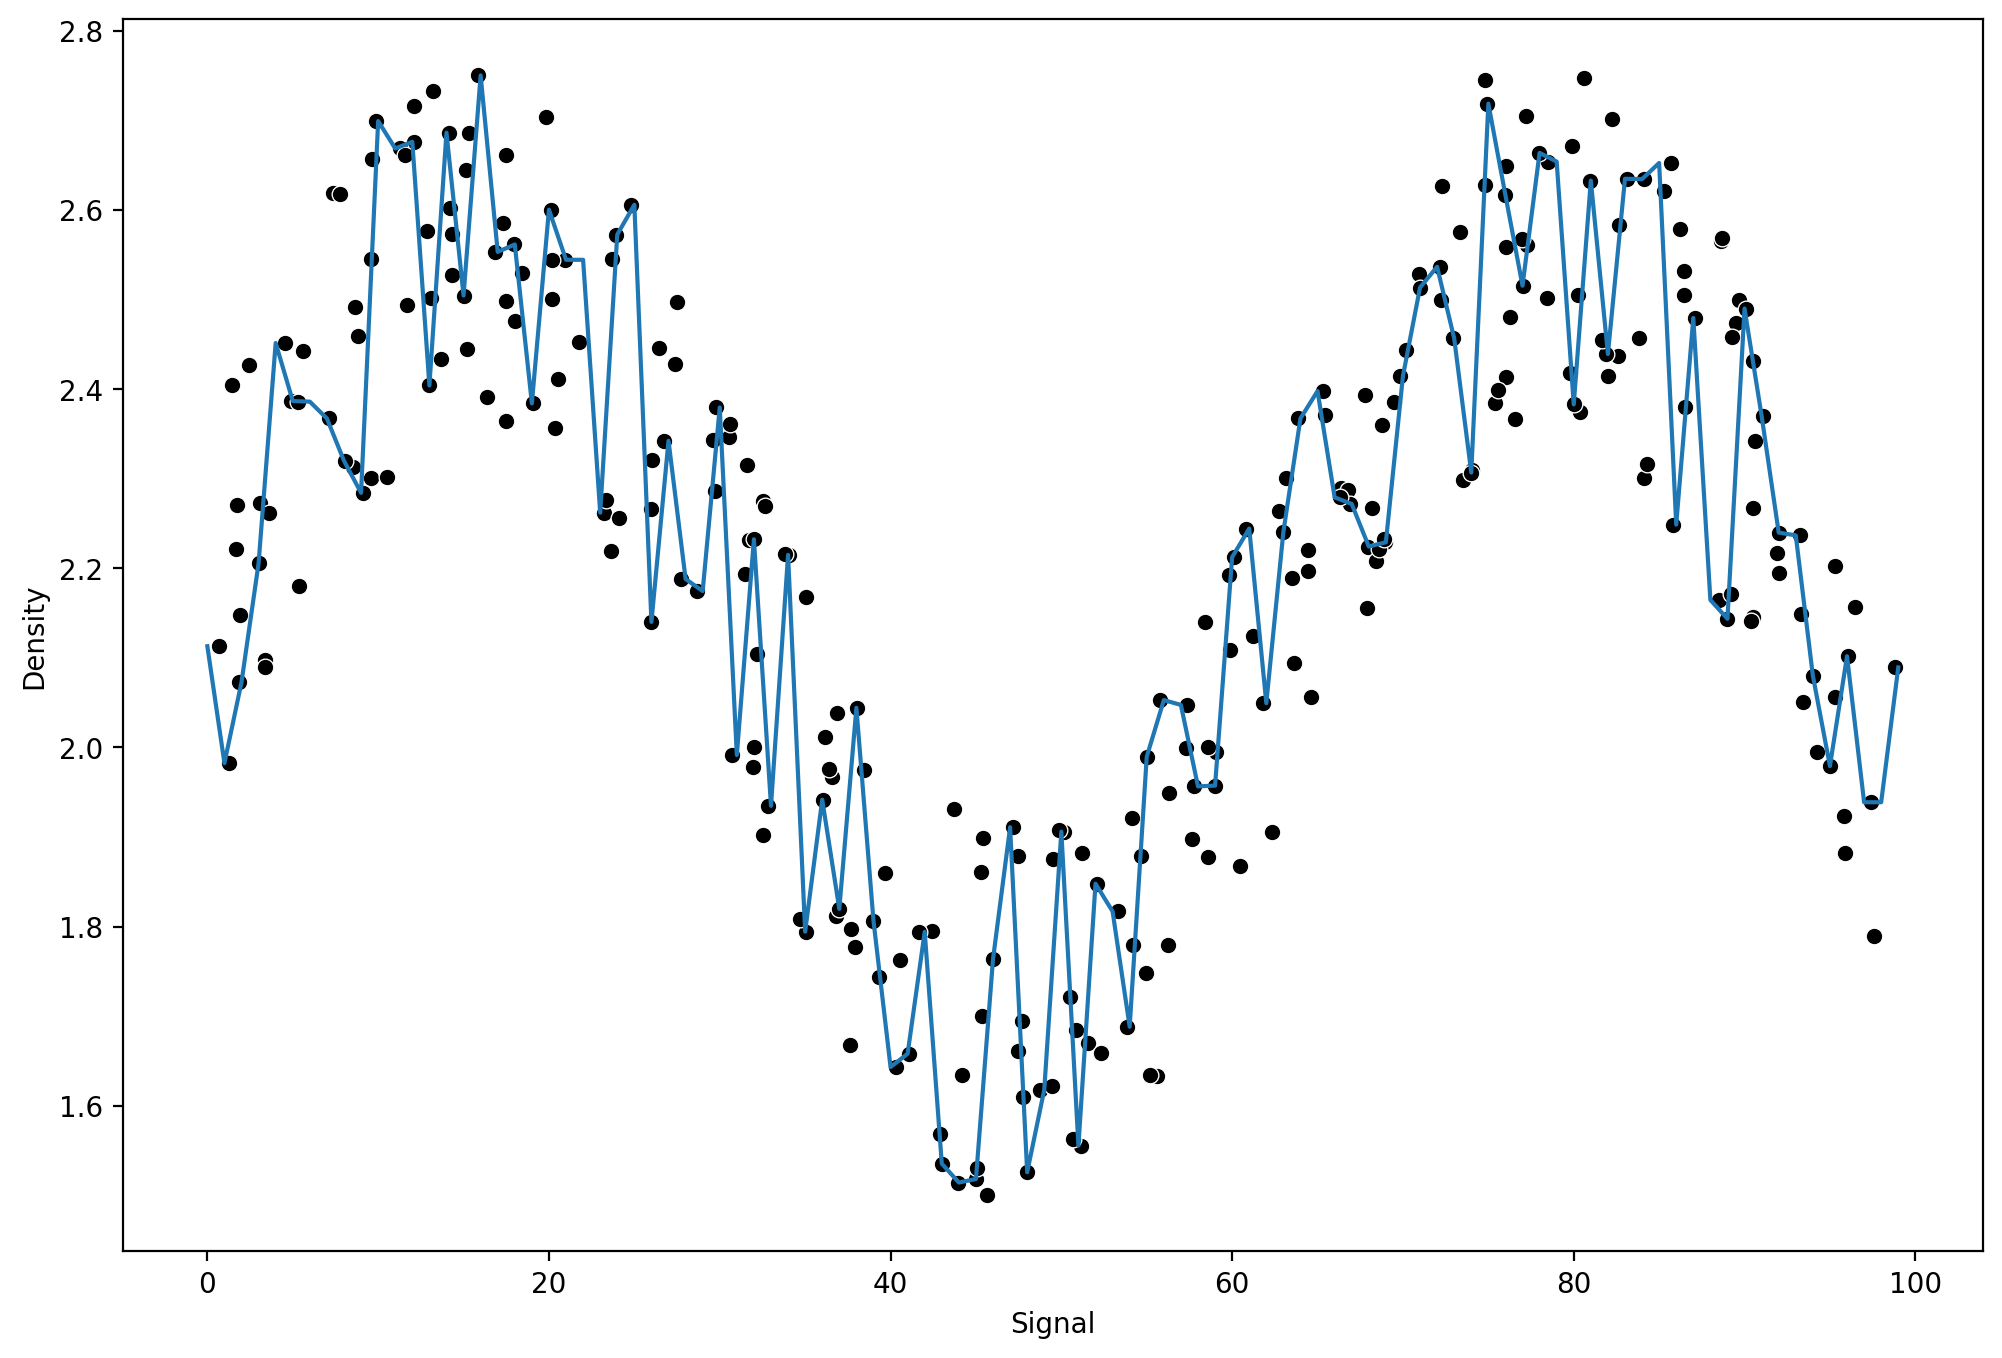

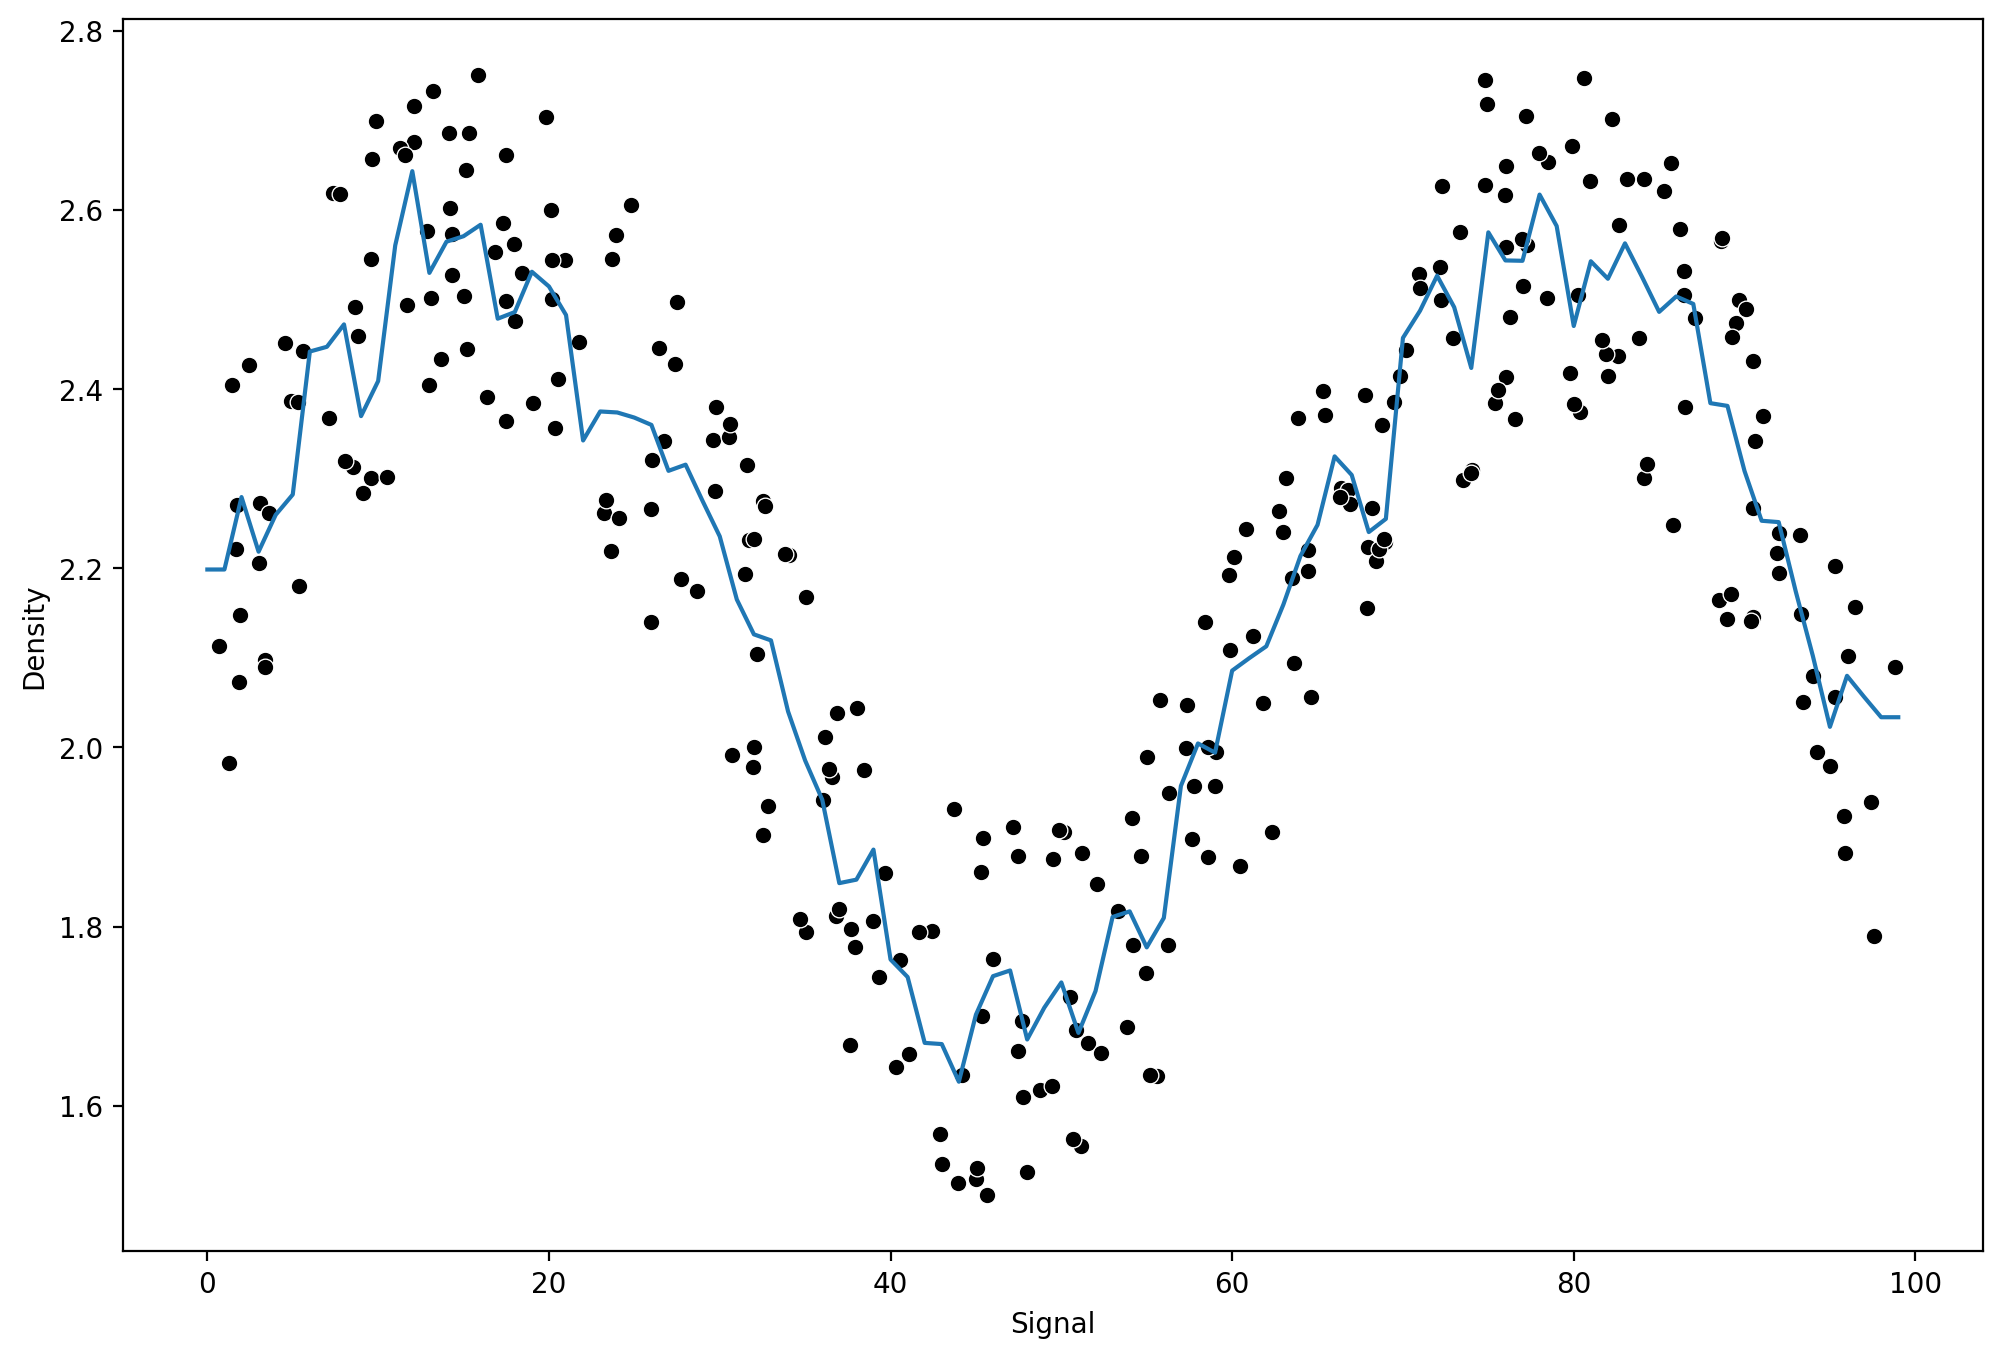

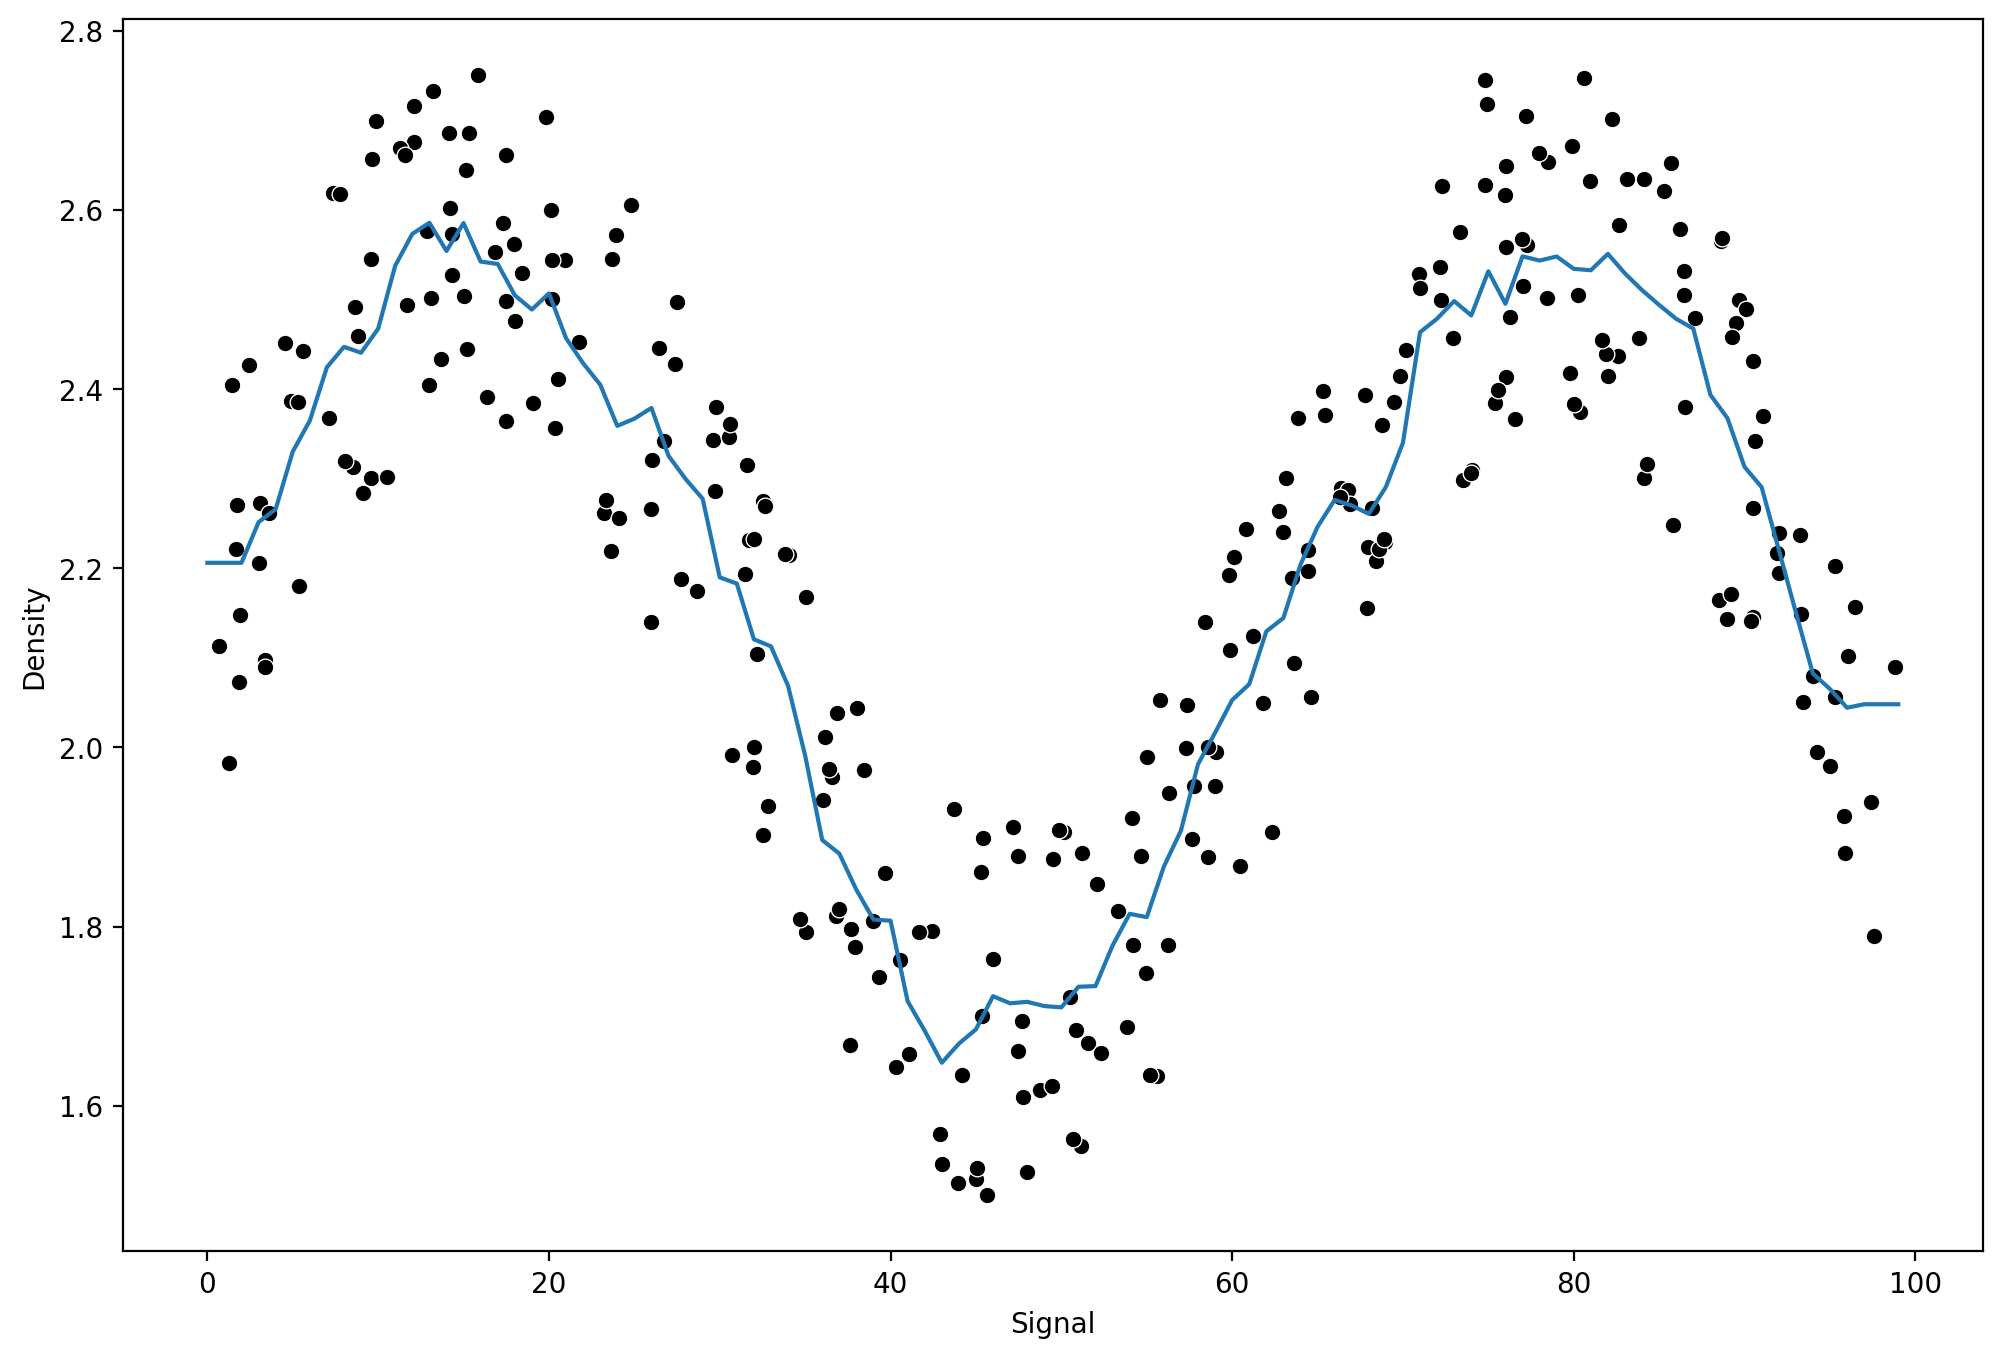

In [88]:
k_values = [1,5,10]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test, y_test)

# Decision Tree Regressor

In [89]:
from sklearn.tree import DecisionTreeRegressor

RMSE: 0.1523487028635337
MAR: 0.11877297474442378



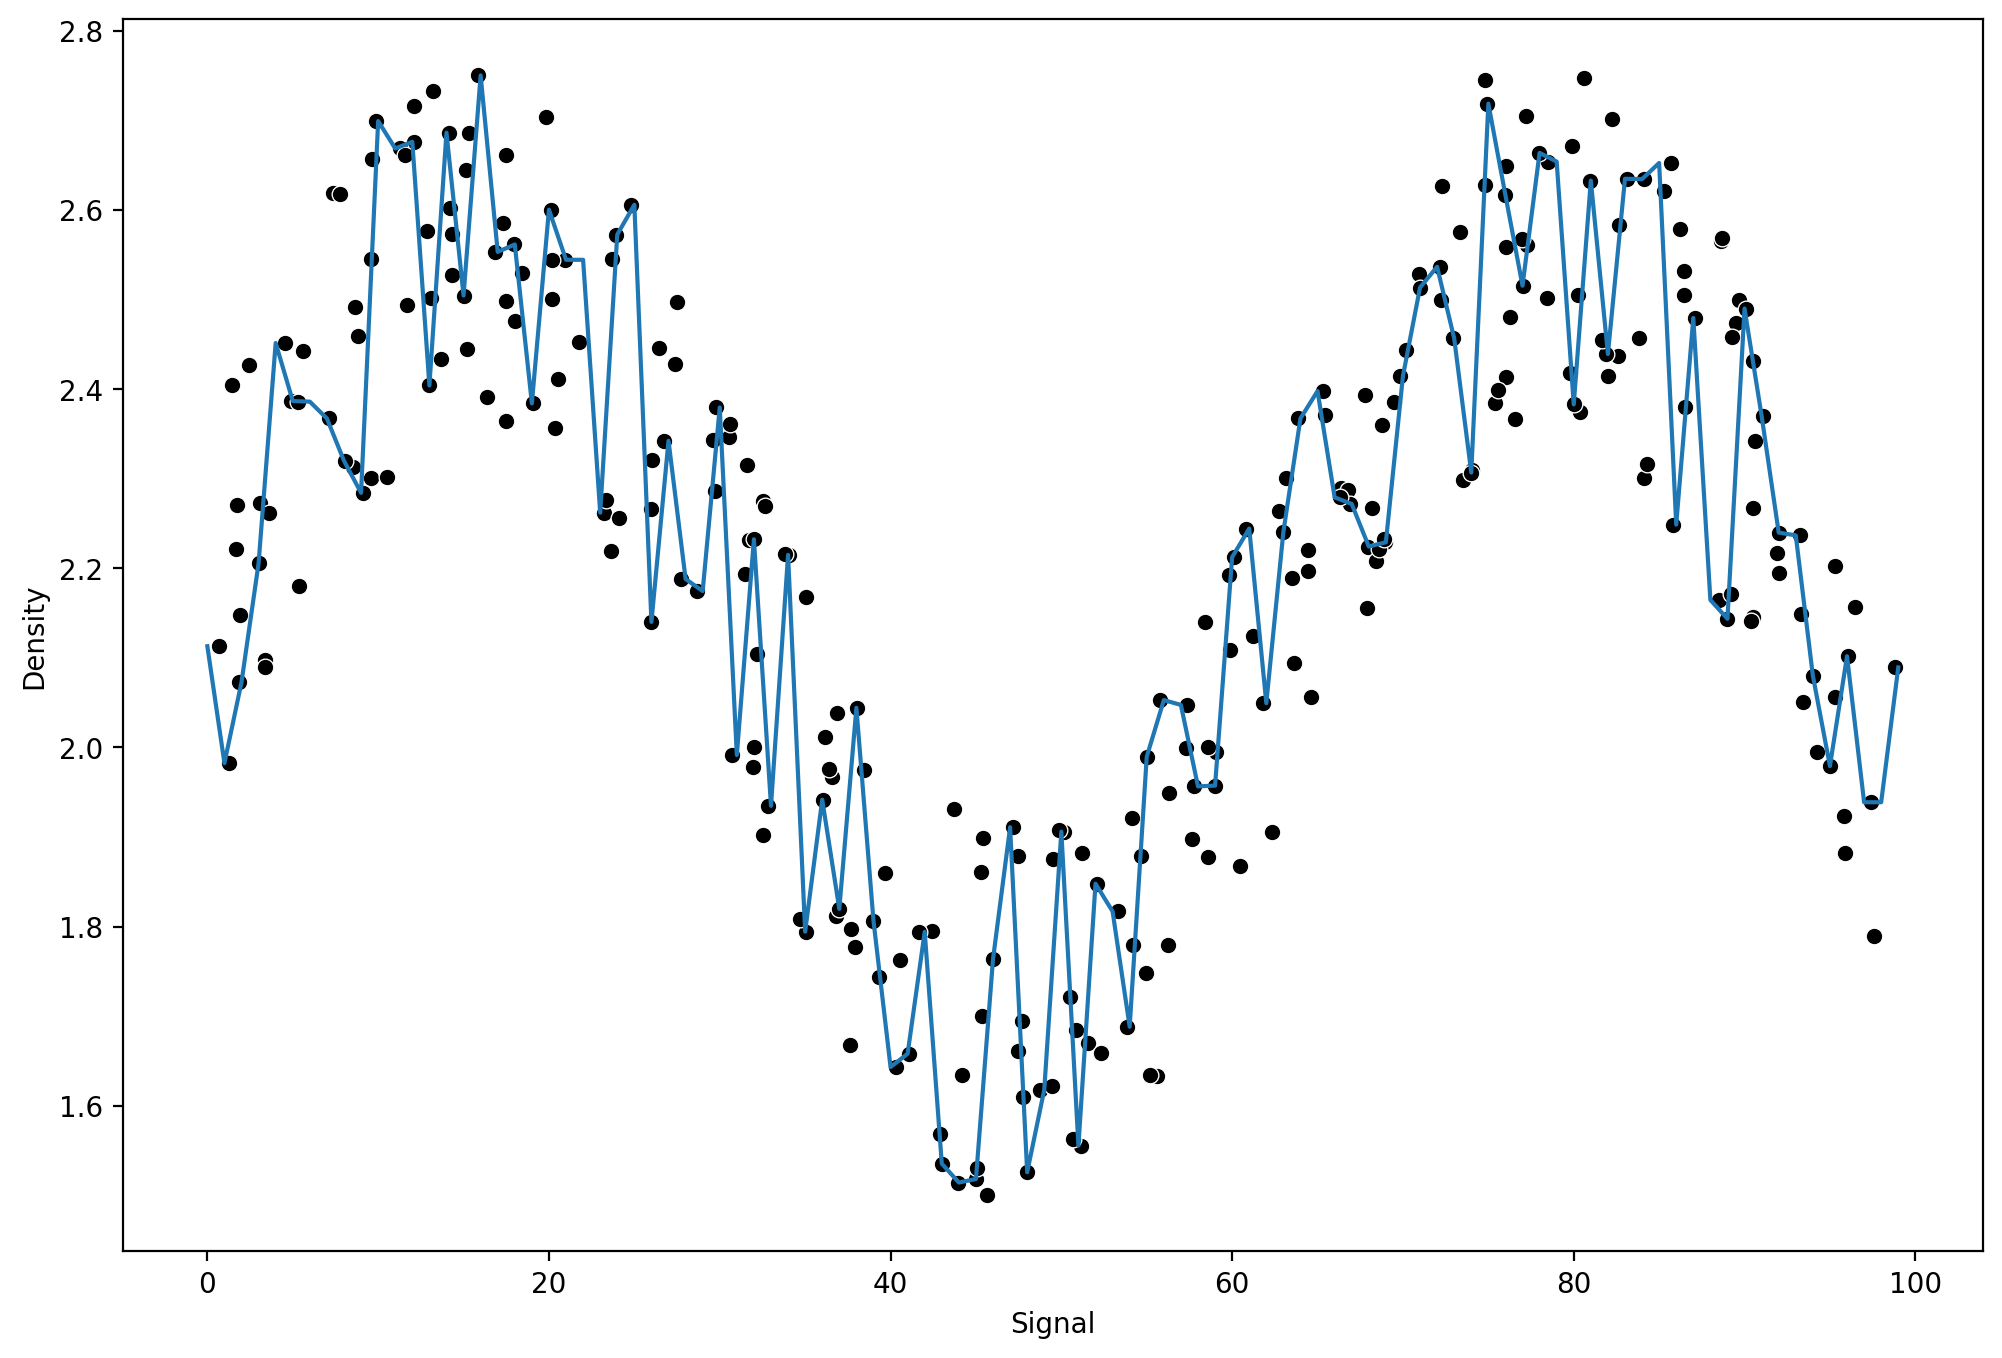

In [90]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

# Supprt vector regressor

In [91]:
from sklearn.svm import SVR

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
svr = SVR()
param_grid = {'C': [0.01, 0.1, 1, 5, 10 ,100, 1000], 'gamma': ['auto', 'scale']}

grid = GridSearchCV(svr, param_grid)

RMSE: 0.12646999302046696
MAR: 0.10854210121348368



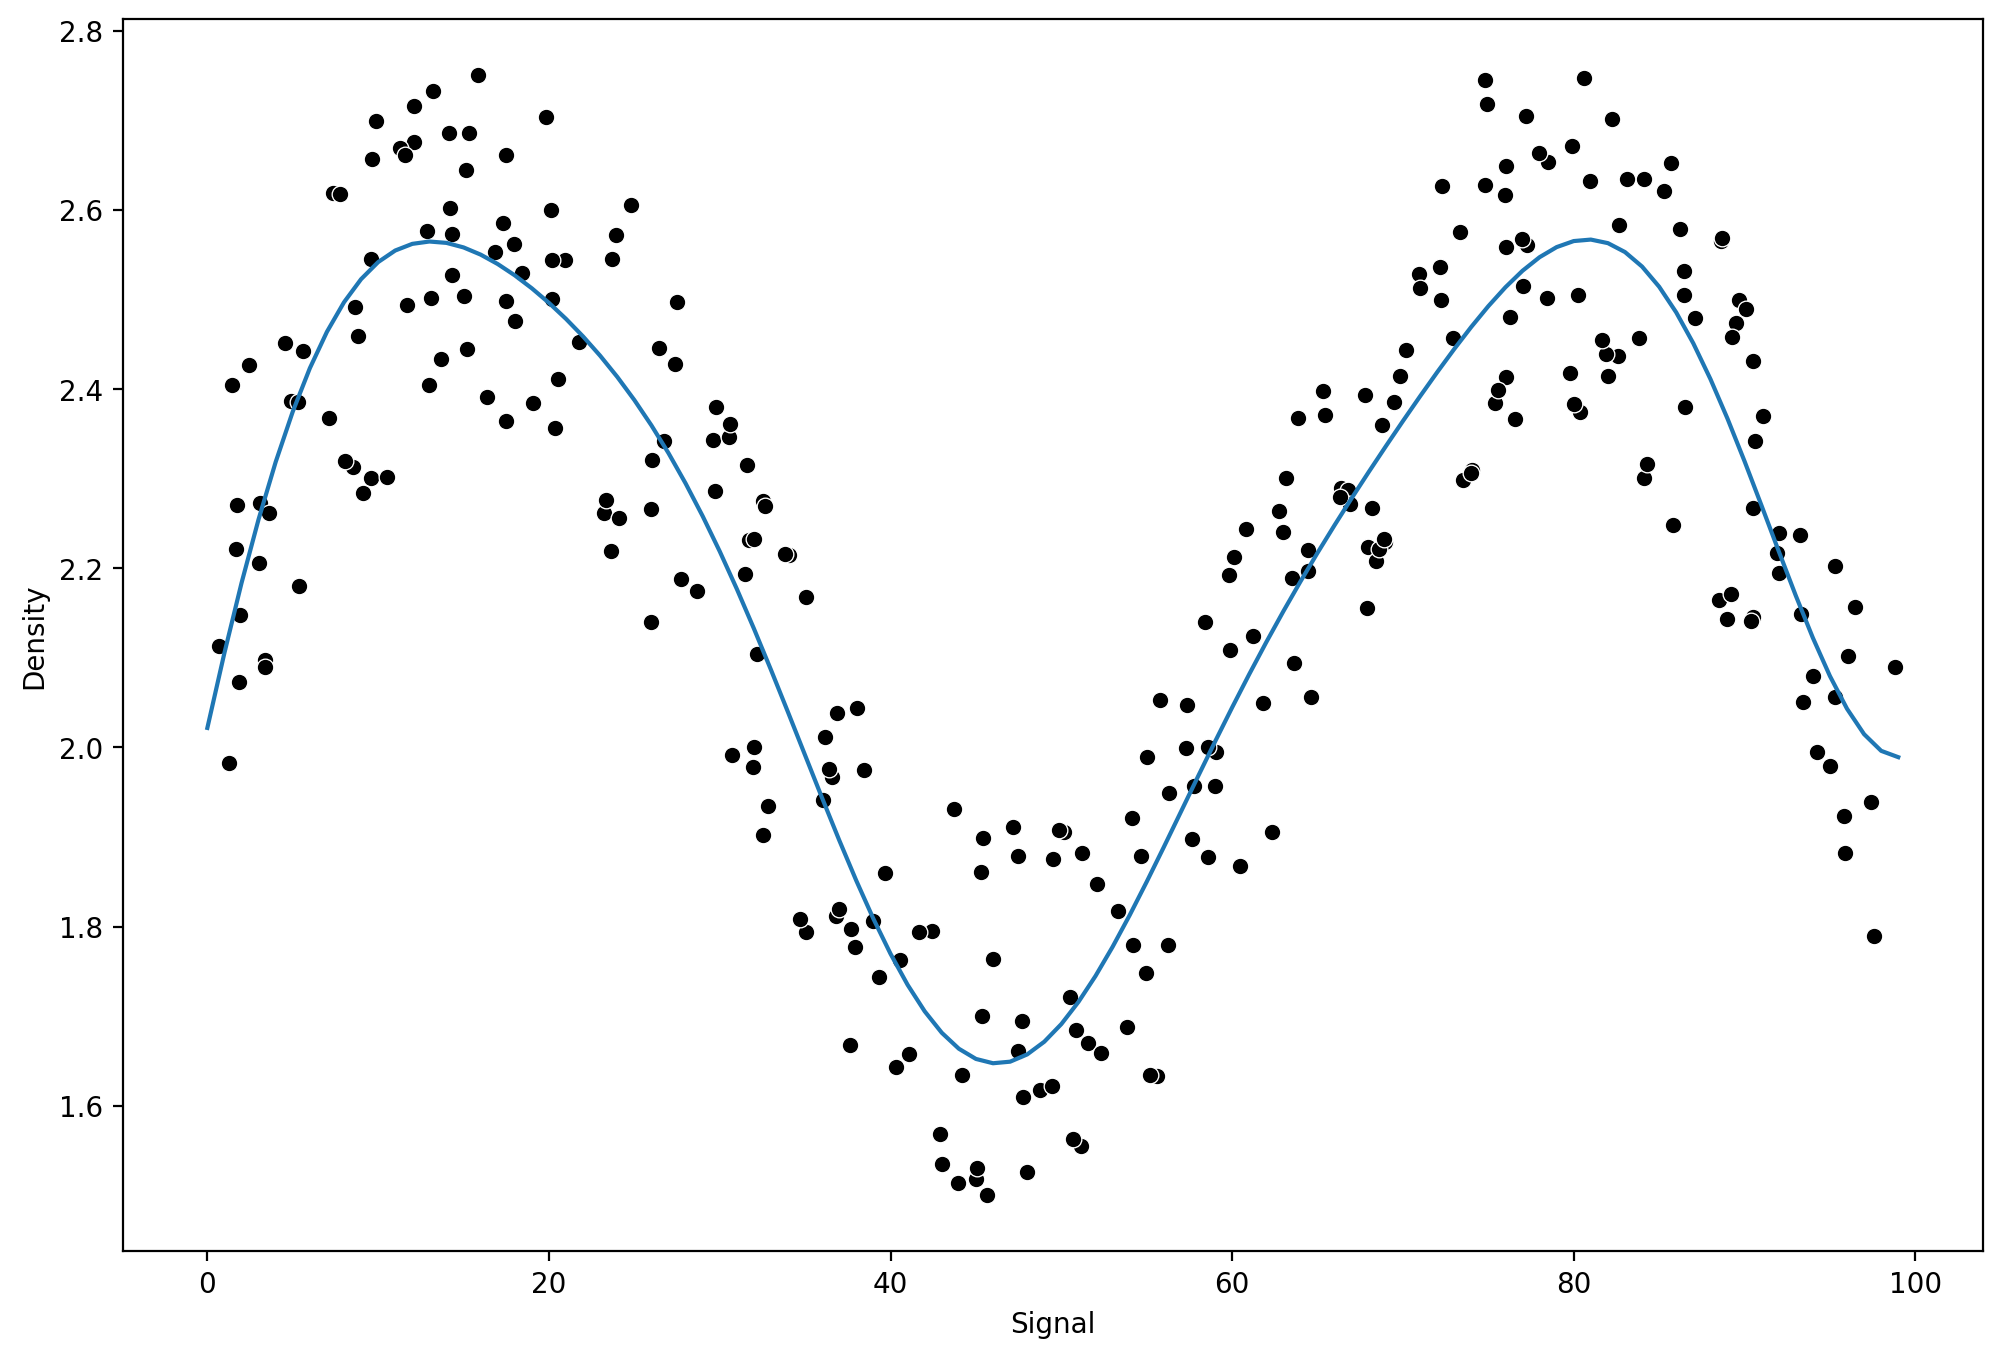

In [95]:
run_model(grid, X_train, y_train, X_test, y_test)

# Random Forest Regressor

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
rfr = RandomForestRegressor(n_estimators=10)

RMSE: 0.1270847015306137
MAR: 0.10604858307184517



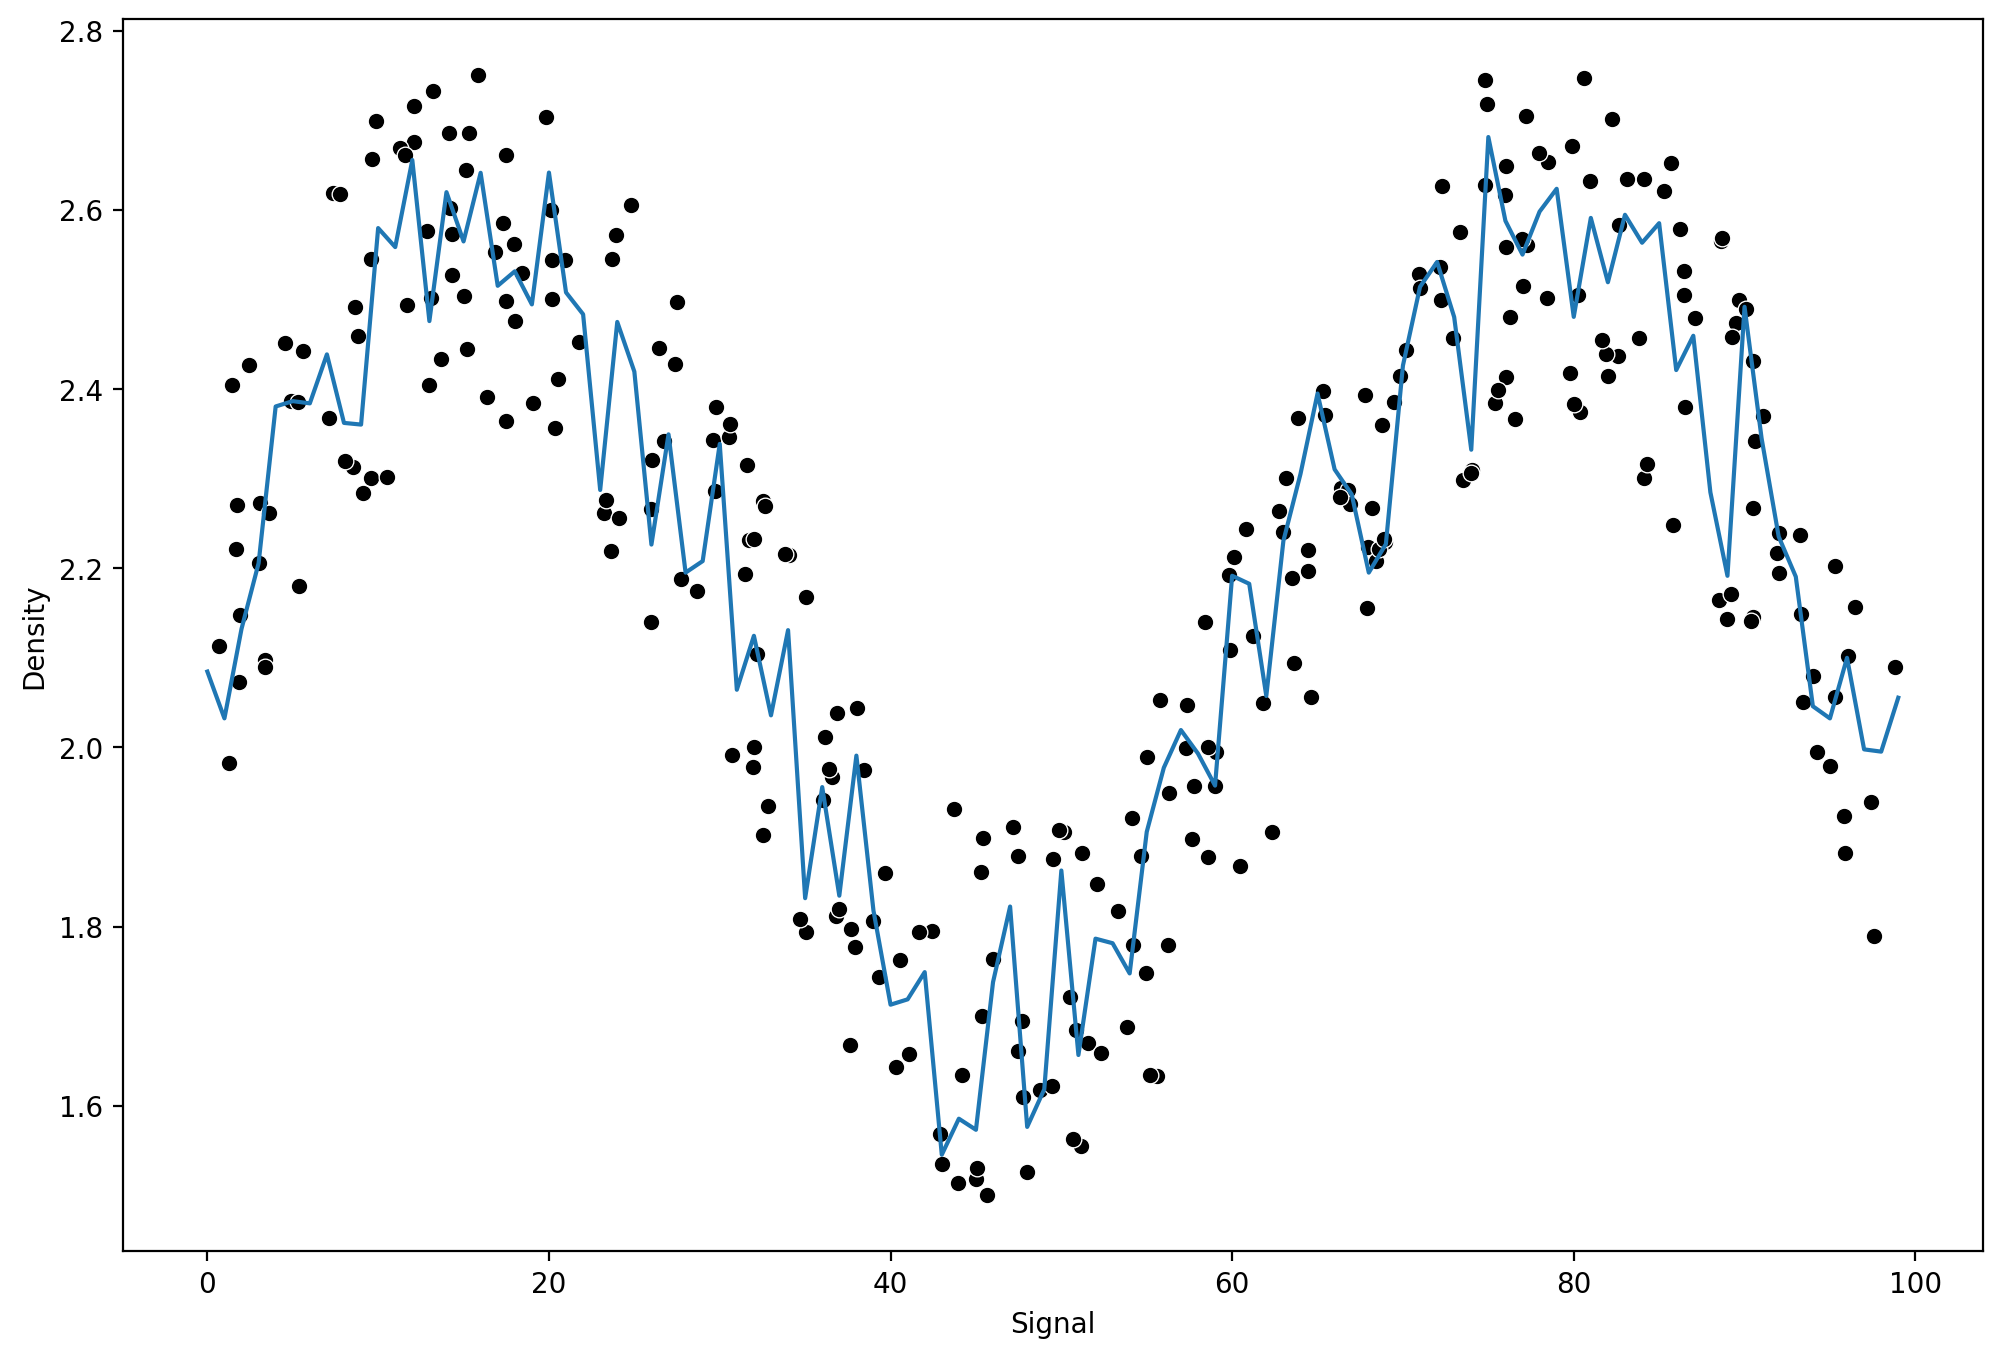

In [98]:
run_model(rfr, X_train, y_train, X_test, y_test)

# Boosting regressor

In [99]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

RMSE: 0.13294148649584667
MAR: 0.11318284854800689



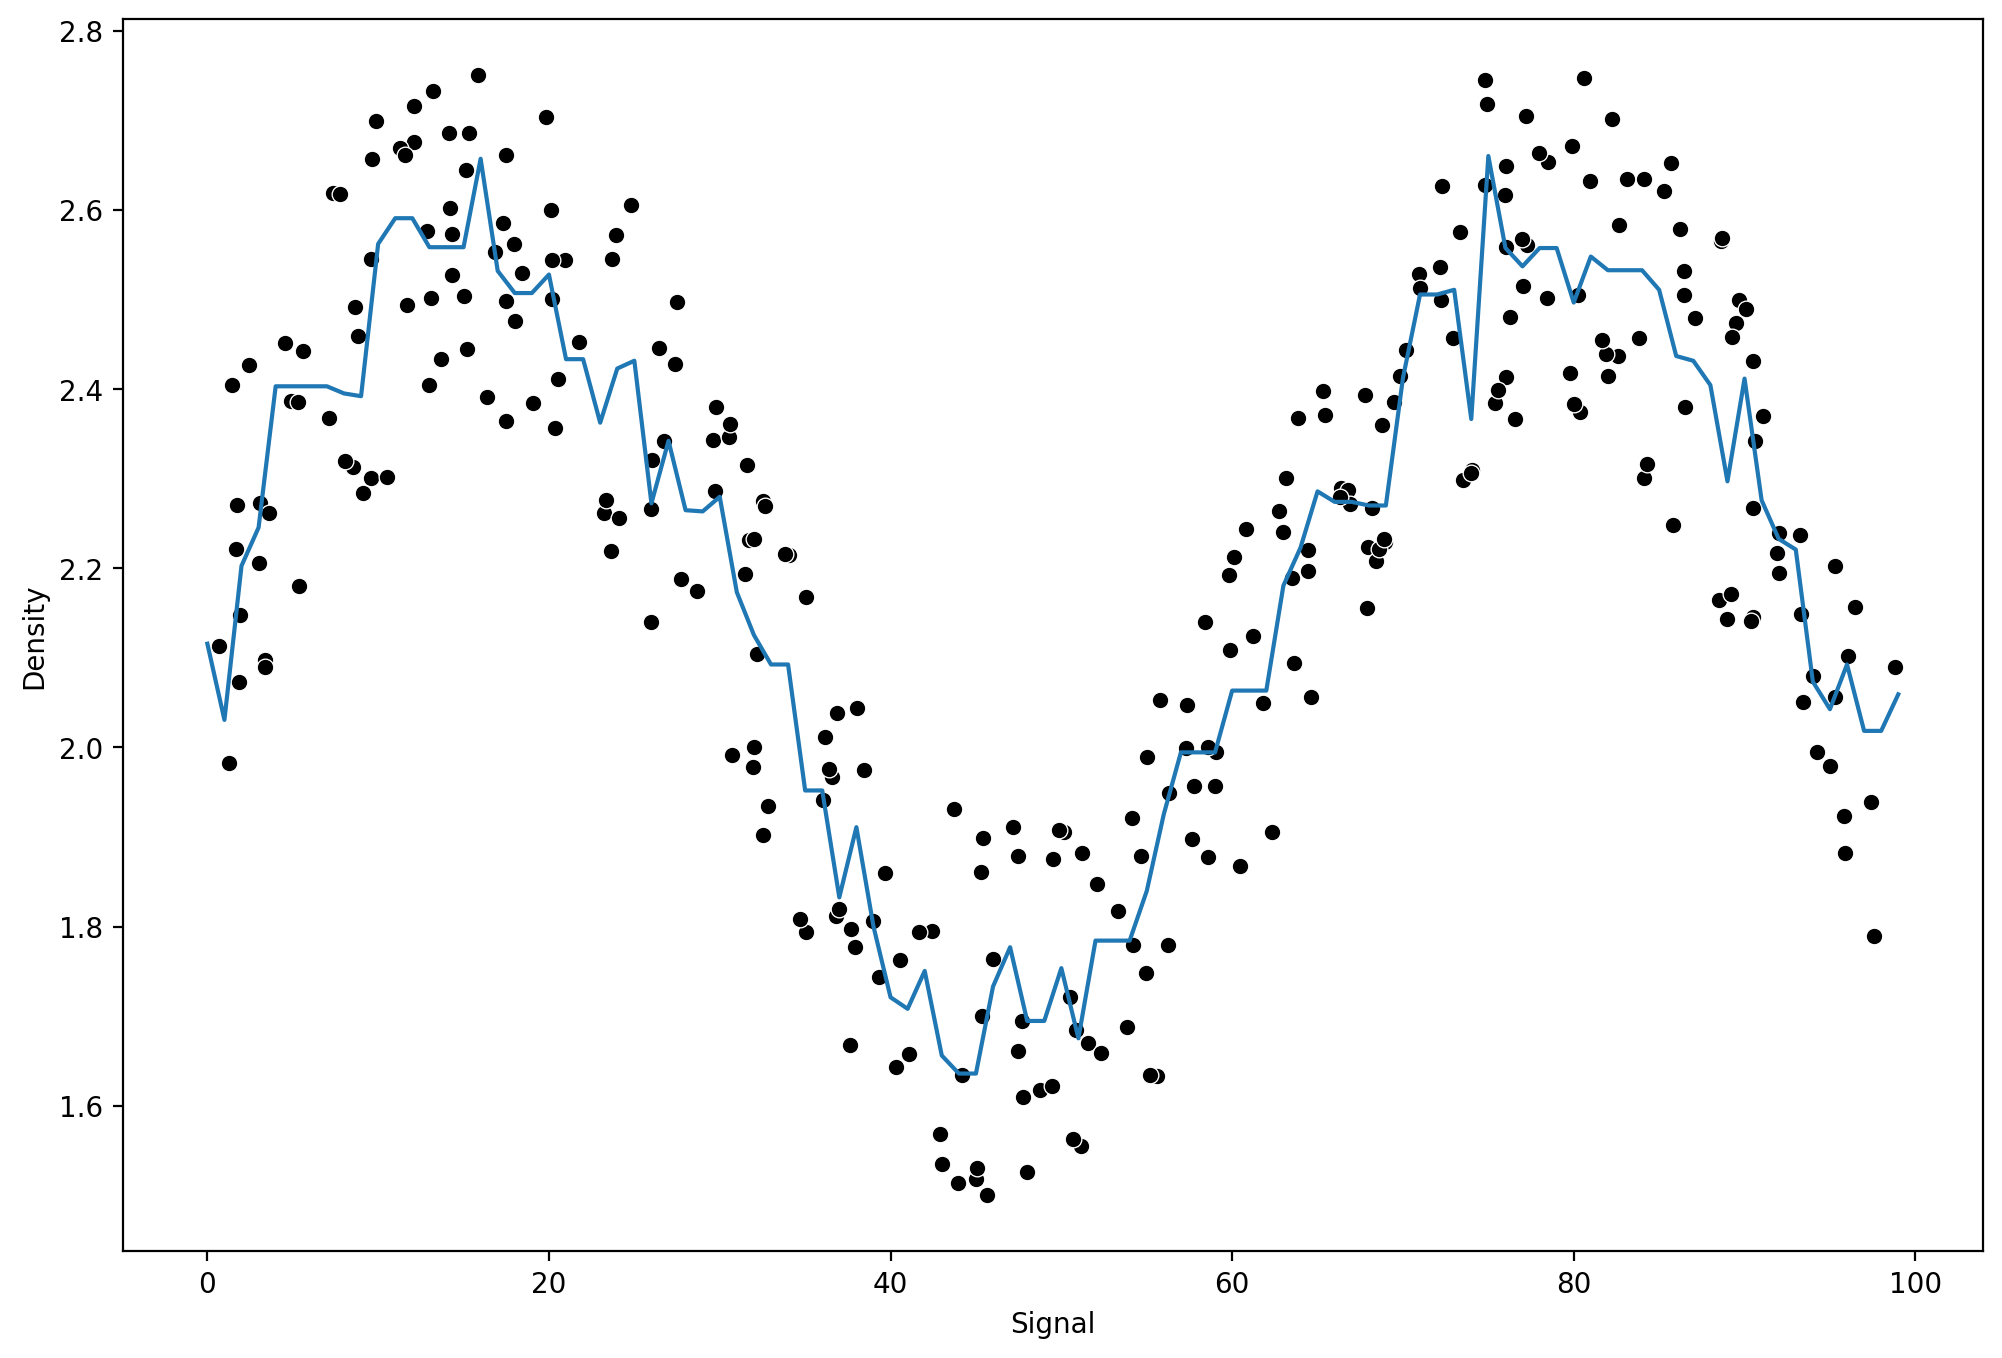

In [100]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)

RMSE: 0.13367800737098415
MAR: 0.11636388352015185



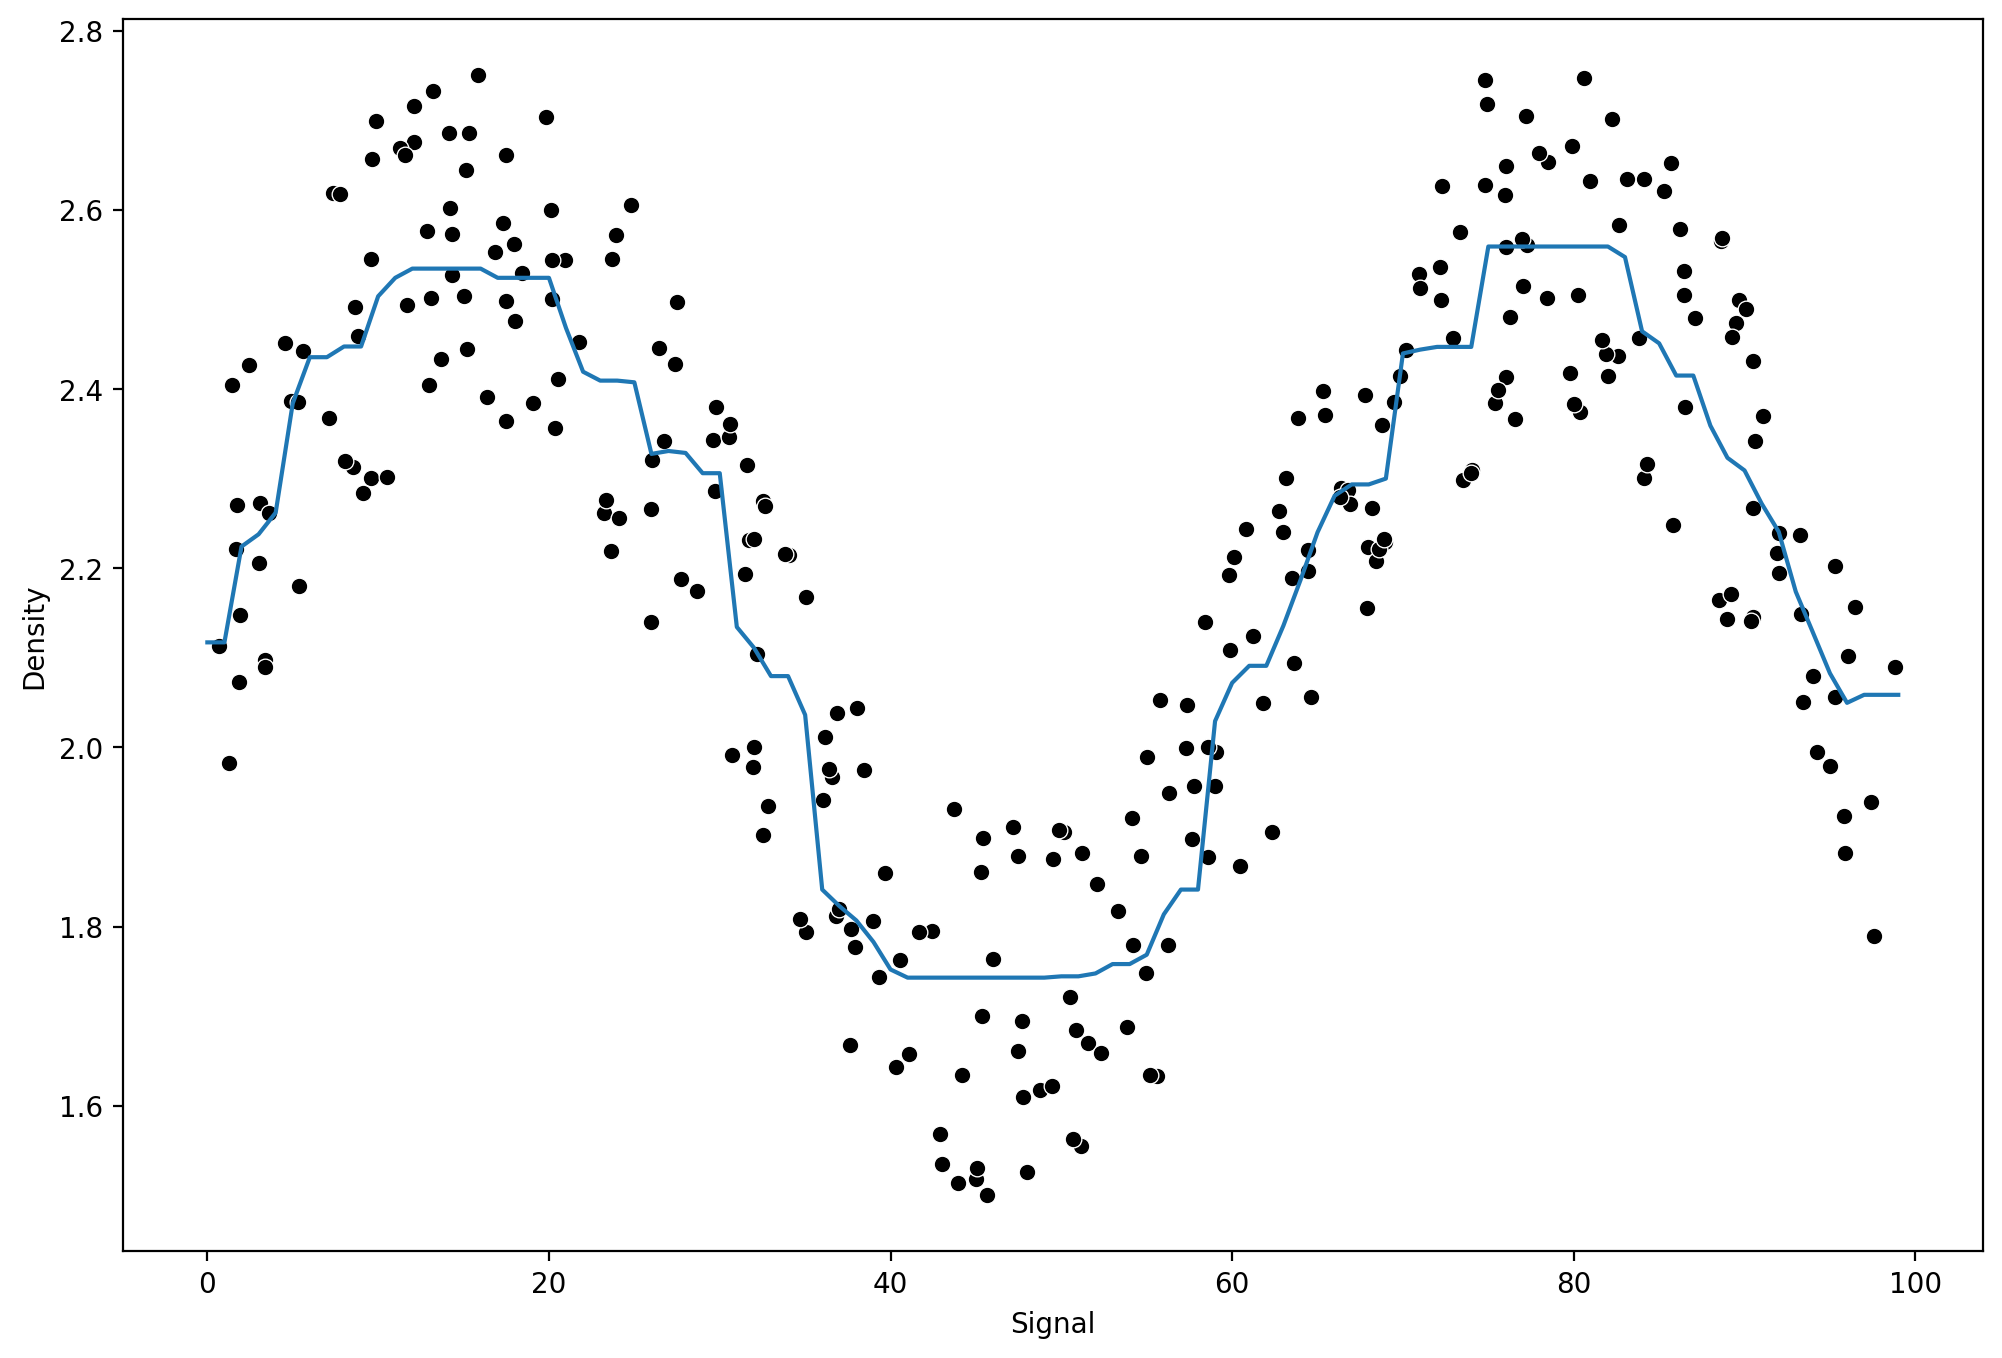

In [101]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)